In [30]:
import re

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import nltk
from wordcloud import WordCloud

from acquire import get_codeup_blog, get_inshorts_articles
from prepare import *
from get_db_url import get_db_url

# Data Exploration Exercises

## 1

Spam Data

### Load the spam data set.

In [2]:
# Get all the data from the spam database
df = pd.read_sql('SELECT * FROM spam;', get_db_url('spam_db'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5572 non-null   int64 
 1   label   5572 non-null   object
 2   text    5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [3]:
df.head()

,id,label,text
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Create and explore bigrams

- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [4]:
# Perform basic cleaning on the messages
df.text = df.text.apply(basic_clean)

In [5]:
# combine ham, spam, and all messages into single strings
spam_words = ' '.join(df[df.label == 'spam'].text)
ham_words = ' '.join(df[df.label == 'ham'].text)
all_words = ' '.join(df.text)

In [6]:
# generate spam words bigrams
spam_bigrams = pd.Series(nltk.bigrams(spam_words.split()))
spam_bigrams.value_counts().head(20)

(you, have)           73
(have, won)           54
(your, mobile)        49
(to, claim)           46
(please, call)        44
(won, a)              40
(this, is)            40
(to, contact)         37
(you, are)            35
(stop, to)            28
(u, have)             27
(cash, or)            27
(will, be)            25
(or, a)               25
(a, a2000)            25
(po, box)             24
(contact, u)          24
(guaranteed, call)    23
(a1000, cash)         23
(to, receive)         23
dtype: int64

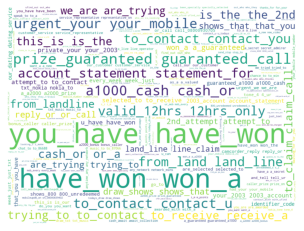

In [7]:
# Create a wordcloud of the spam bigrams

img = WordCloud(
    background_color = 'white',
    width = 800,
    height = 600
).generate(' '.join(spam_bigrams.apply(lambda row: '_'.join(row))))
plt.imshow(img)
plt.axis('off');

In [8]:
# generate ham words bigrams
ham_bigrams = pd.Series(nltk.bigrams(ham_words.split()))
ham_bigrams.value_counts().head(20)

(are, you)     173
(i, am)        132
(have, a)      110
(i, will)       98
(do, you)       91
(you, are)      91
(in, the)       86
(i, have)       83
(if, you)       83
(want, to)      79
(going, to)     76
(i, was)        74
(in, a)         73
(and, i)        71
(i, can)        71
(but, i)        70
(have, to)      70
(to, be)        66
(to, get)       65
(on, the)       61
dtype: int64

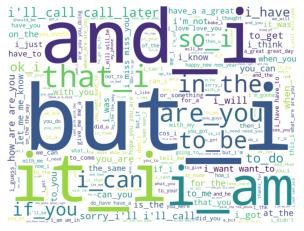

In [9]:
# Create a wordcloud of the ham bigrams

img = WordCloud(
    background_color = 'white',
    width = 800,
    height = 600
).generate(' '.join(ham_bigrams.apply(lambda row: '_'.join(row))))
plt.imshow(img)
plt.axis('off');

The ham bigrams often have the word I in them where as the spam bigrams often have the words you and won.

### Overlap in bigrams

- Is there any overlap in the bigrams for the spam data and the ham data?

In [10]:
spam_bigrams.shape, ham_bigrams.shape

((17593,), (67534,))

In [11]:
# Let's see all spam_bigrams that are also in ham_bigrams
spam_bigrams[spam_bigrams.isin(ham_bigrams)].shape

(3283,)

In [12]:
spam_bigrams[spam_bigrams.isin(ham_bigrams)].value_counts().head(20)

(you, have)       73
(please, call)    44
(this, is)        40
(to, contact)     37
(you, are)        35
(u, have)         27
(will, be)        25
(or, a)           25
(po, box)         24
(with, a)         22
(for, your)       22
(have, a)         21
(a, new)          21
(contact, you)    20
(go, to)          19
(every, week)     19
(out, who)        18
(call, now)       18
(to, win)         18
(find, out)       18
dtype: int64

There are some spam bigrams that also appear in ham bigrams including the most frequent spam bigram.

### Trigrams

- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [13]:
# generate spam words trigrams
spam_trigrams = pd.Series(nltk.ngrams(spam_words.split(), 3))
spam_trigrams.value_counts().head(20)

(you, have, won)             37
(have, won, a)               33
(prize, guaranteed, call)    21
(a1000, cash, or)            19
(urgent, your, mobile)       18
(to, contact, u)             18
(account, statement, for)    16
(from, land, line)           16
(valid, 12hrs, only)         16
(to, contact, you)           16
(is, the, 2nd)               15
(this, is, the)              15
(trying, to, contact)        15
(cash, or, a)                15
(we, are, trying)            14
(2nd, attempt, to)           14
(draw, shows, that)          14
(land, line, claim)          14
(reply, or, call)            14
(are, trying, to)            14
dtype: int64

In [14]:
# generate ham words trigrams
ham_trigrams = pd.Series(nltk.ngrams(ham_words.split(), 3))
ham_trigrams.value_counts().head(20)

(i'll, call, later)    39
(sorry, i'll, call)    38
(how, are, you)        35
(i, want, to)          29
(let, me, know)        26
(have, a, great)       25
(i, miss, you)         24
(i, love, you)         23
(hope, you, are)       20
(i, have, to)          20
(give, me, a)          19
(happy, new, year)     18
(a, great, day)        17
(do, have, a)          17
(where, are, you)      16
(i, am, in)            16
(are, you, doing)      16
(what, are, you)       16
(on, the, way)         16
(you, want, to)        16
dtype: int64

In [15]:
# Let's see if any spam trigrams also appear in the ham trigrams
spam_trigrams[spam_trigrams.isin(ham_trigrams)].shape

(399,)

In [16]:
spam_trigrams[spam_trigrams.isin(ham_trigrams)].value_counts().head(20)

(to, contact, you)     16
(this, is, the)        15
(are, trying, to)      14
(that, you, have)      12
(do, you, want)        11
(find, out, who)       10
(waiting, for, you)    10
(you, have, been)      10
(thanks, for, your)     8
(u, have, a)            8
(to, find, out)         8
(you, to, be)           6
(call, from, a)         6
(you, are, a)           6
(if, you, have)         5
(to, be, her)           5
(you, have, a)          5
(all, will, be)         5
(there, is, an)         5
(from, a, landline)     4
dtype: int64

## 2

Explore the blog articles using the techniques discussed in the exploration lesson.

### Acquire and Prepare

In [17]:
codeup_df = get_codeup_blog()
codeup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    220 non-null    object
 1   date     220 non-null    object
 2   content  218 non-null    object
dtypes: object(3)
memory usage: 5.3+ KB


In [18]:
codeup_df = prepare_article_data(codeup_df)

### Explore Word Frequencies and n-grams

In [19]:
# create a string of all the words in each article using the basic cleaned version of each article
words = ' '.join(codeup_df.basic_clean)

In [20]:
pd.Series(words.split()).value_counts().head(20)

the       4023
to        4005
and       3445
a         3233
of        2344
in        1981
you       1742
for       1399
i         1328
is        1294
that      1261
with       988
codeup     814
your       792
it         788
are        780
on         766
our        734
we         726
as         689
dtype: int64

In [21]:
# create bigrams
codeup_df_bigrams = pd.Series(nltk.bigrams(words.split()))
codeup_df_bigrams.value_counts().head(20)

(in, the)          366
(of, the)          331
(data, science)    239
(as, a)            208
(to, be)           190
(i, was)           170
(san, antonio)     166
(is, a)            165
(to, learn)        159
(in, a)            147
(to, the)          146
(want, to)         144
(on, the)          136
(for, the)         133
(how, to)          133
(with, a)          131
(if, you)          129
(you, can)         128
(with, the)        119
(and, the)         110
dtype: int64

The stopwords are getting in the way of allowing us to gather any real insights. Let's use the fully cleaned articles instead.

In [22]:
words = ' '.join(codeup_df.clean)

In [23]:
# Let's try creating bigrams again
codeup_df_bigrams = pd.Series(nltk.bigrams(words.split()))
codeup_df_bigrams.value_counts().head(20)

(data, science)            239
(san, antonio)             166
(web, development)          88
(data, scientist)           65
(software, developer)       54
(data, scientists)          47
(machine, learning)         47
(make, sure)                46
(coding, bootcamp)          45
(software, development)     38
(tech, industry)            37
(web, developer)            36
(full, stack)               32
(computer, science)         31
(career, accelerator)       30
(software, developers)      29
(get, job)                  26
(every, day)                24
(financial, aid)            24
(job, search)               24
dtype: int64

That's better. We see a lot of what we might expect from Codeup blog articles which is tech related terminology.

In [24]:
# Let's try trigrams
codeup_df_trigrams = pd.Series(nltk.ngrams(words.split(), 3))
codeup_df_trigrams.value_counts().head(20)

(data, science, program)            18
(web, development, program)         17
(hired, accenture, federal)         13
(full, stack, web)                  13
(stack, web, development)           12
(codeup, data, science)             12
(fullstack, web, development)       12
(give, us, call)                    12
(career, data, science)             11
(accenture, federal, software)      10
(hired, cgi, java)                  10
(federal, software, engineering)    10
(data, science, career)             10
(tech, job, fair)                    9
(codeup, success, story)             9
(data, science, pipeline)            9
(san, antonio, tech)                 8
(empowering, life, change)           8
(empower, life, change)              8
(become, data, scientist)            7
dtype: int64

Now we can see a little about the companies that typically hire Codeup graduates.

### Feature Engineering

In [35]:
# Let's create features for character count, word count, sentence count, and stopword count

codeup_df['character_count'] = codeup_df.original.apply(len)
codeup_df['word_count'] = codeup_df.basic_clean.apply(lambda text: len(text.split()))
codeup_df['sentence_count'] = codeup_df.original.apply(lambda text: len(re.split(r'[\.!\?]', text)))
codeup_df['stopword_count'] = codeup_df.basic_clean.apply(len) - codeup_df.clean.apply(len)

In [36]:
codeup_df[['character_count', 'word_count', 'sentence_count', 'stopword_count']].head(10)

,character_count,word_count,sentence_count,stopword_count
0,8275,1413,89,2399
1,4996,829,61,1335
2,4523,714,42,1242
3,3116,544,42,986
4,2176,362,25,633
5,6163,1070,53,2270
6,1593,256,18,455
7,1941,289,22,441
8,5514,926,64,1878
9,2659,456,22,723
